## Подгрузим библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Добавим настройки

In [2]:
sns.set_theme()

In [3]:
ri = 'RI/concat_RI.csv'

In [4]:
si = 'concat_Si.csv'

In [5]:
gz = 'concat_GZ.csv'

In [6]:
sr = 'concat_SR.csv'

## Считаем файл с фьючерсом

In [7]:
data = pd.read_csv(ri, parse_dates=['date'])

In [8]:
data = data.sort_values(by='date')
data.set_index('date', inplace=True)

## Считали

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4072 entries, 2006-09-15 to 2022-12-05
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4072 non-null   int64  
 1   close          4055 non-null   float64
 2   name           4072 non-null   object 
 3   return         4071 non-null   float64
 4   ln_r           4071 non-null   float64
 5   volatility_5   4067 non-null   float64
 6   volatility_20  4052 non-null   float64
 7   volatility_60  4005 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 286.3+ KB


In [10]:
data.head(5)

,Unnamed: 0,close,name,return,ln_r,volatility_5,volatility_20,volatility_60
date,,,,,,,,
2006-09-15,0,156180.0,RIH07-ru.csv,NaN,NaN,NaN,NaN,NaN
2006-09-18,1,158760.0,RIH07-ru.csv,1.016519,0.016384,NaN,NaN,NaN
2006-09-19,2,160200.0,RIH07-ru.csv,1.009070,0.009029,NaN,NaN,NaN
2006-09-20,3,NaN,RIH07-ru.csv,1.000000,0.000000,NaN,NaN,NaN
2006-09-21,4,154995.0,RIH07-ru.csv,0.967509,-0.033030,NaN,NaN,NaN


In [11]:
data.tail(5)

,Unnamed: 0,close,name,return,ln_r,volatility_5,volatility_20,volatility_60
date,,,,,,,,
2022-11-29,4067,112650.0,RIZ22-ru.csv,1.008957,0.008917,13.691348,27.127537,35.577041
2022-11-30,4068,112140.0,RIZ22-ru.csv,0.995473,-0.004538,13.726187,27.141724,35.473038
2022-12-01,4069,111930.0,RIZ22-ru.csv,0.998127,-0.001874,13.440082,27.024941,35.337671
2022-12-02,4070,110750.0,RIZ22-ru.csv,0.989458,-0.010598,14.471873,27.091311,35.215672
2022-12-05,4071,111750.0,RIZ22-ru.csv,1.009029,0.008989,13.884235,24.312722,35.050102


## EDA

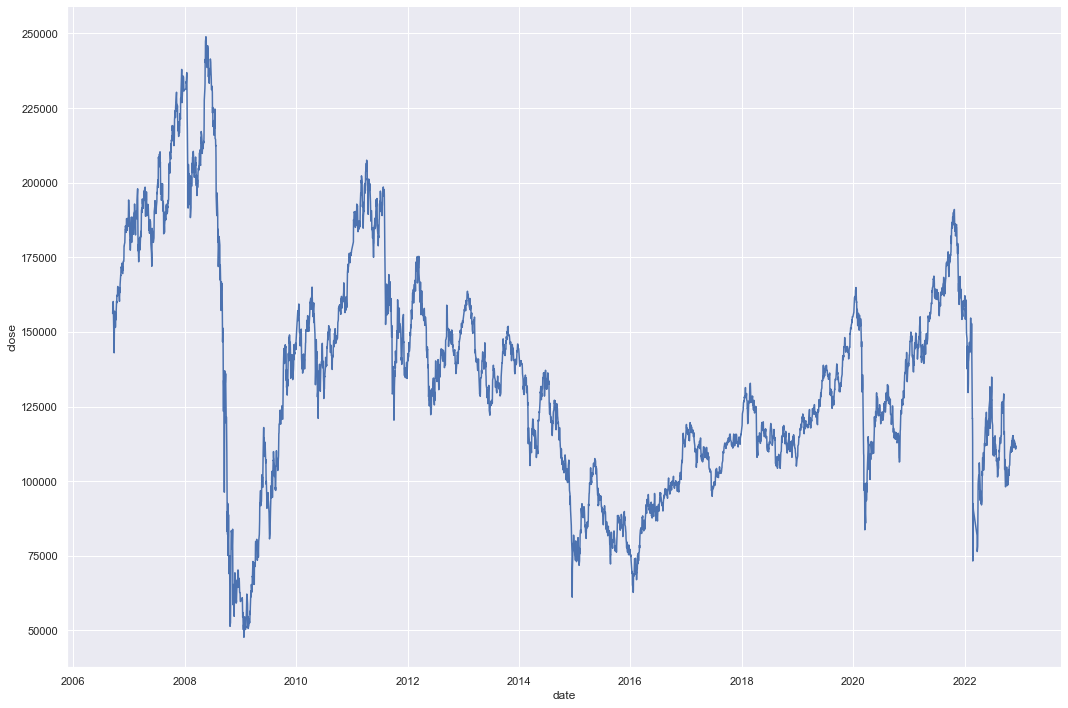

In [12]:
sns.relplot(data = data, x = 'date', y = 'close', kind = 'line', height = 10, aspect = 1.5)

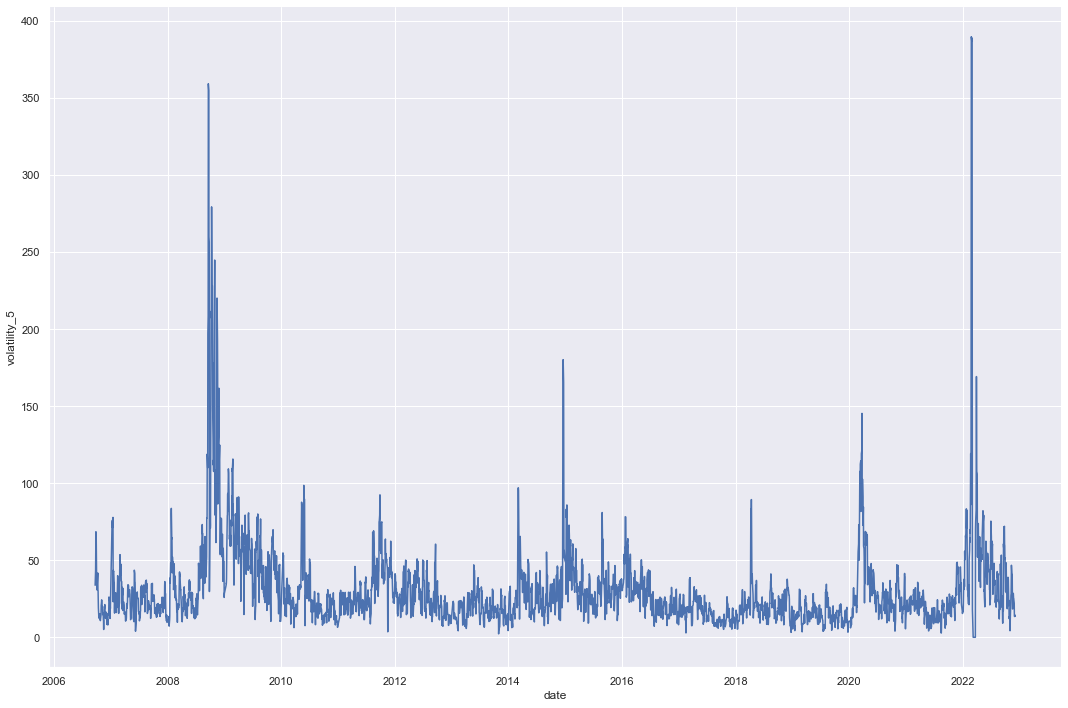

In [13]:
sns.relplot(data = data, x = 'date', y = 'volatility_5', kind = 'line', height = 10, aspect = 1.5)

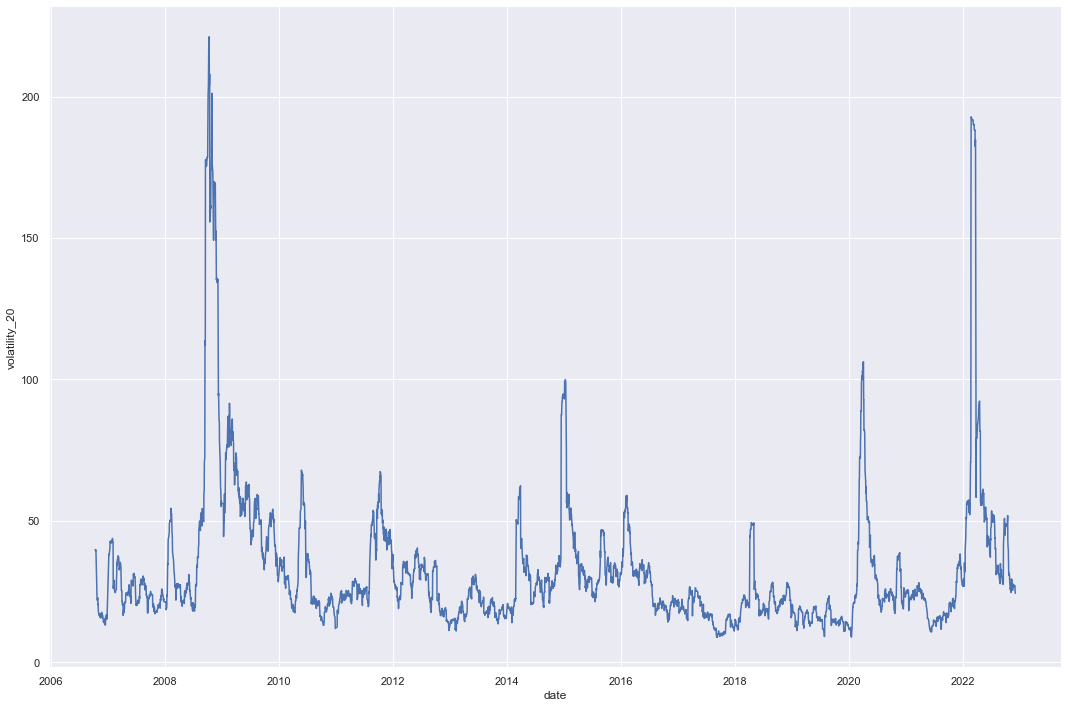

In [14]:
sns.relplot(data = data, x = 'date', y = 'volatility_20', kind = 'line', height = 10, aspect = 1.5)

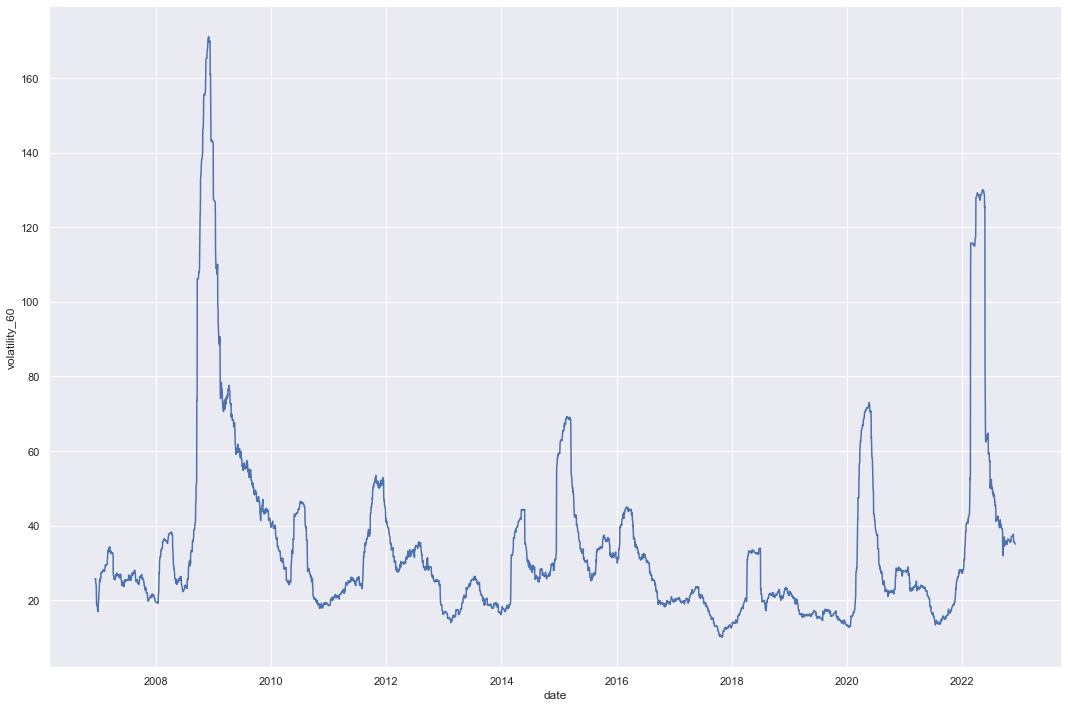

In [15]:
sns.relplot(data = data, x = 'date', y = 'volatility_60', kind = 'line', height = 10, aspect = 1.5)

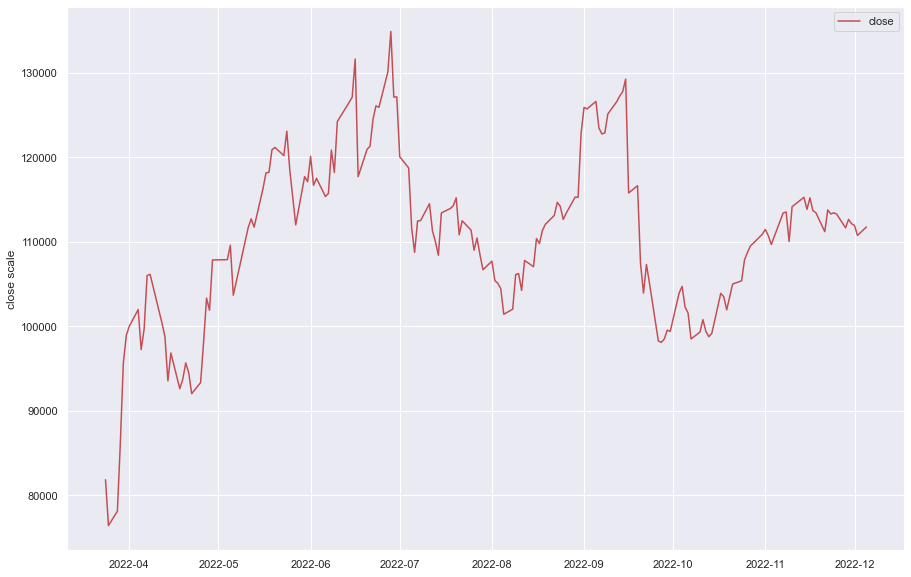

In [16]:
print_start_date = '2022-03-01'
f, ax = plt.subplots(figsize = (15, 10))
sns.lineplot(data = data[data.index > print_start_date], x = 'date', 
             y = 'close', color = 'r', ax = ax, label = 'close')
ax.set_xlabel('')
ax.set_ylabel('close scale')
plt.show()

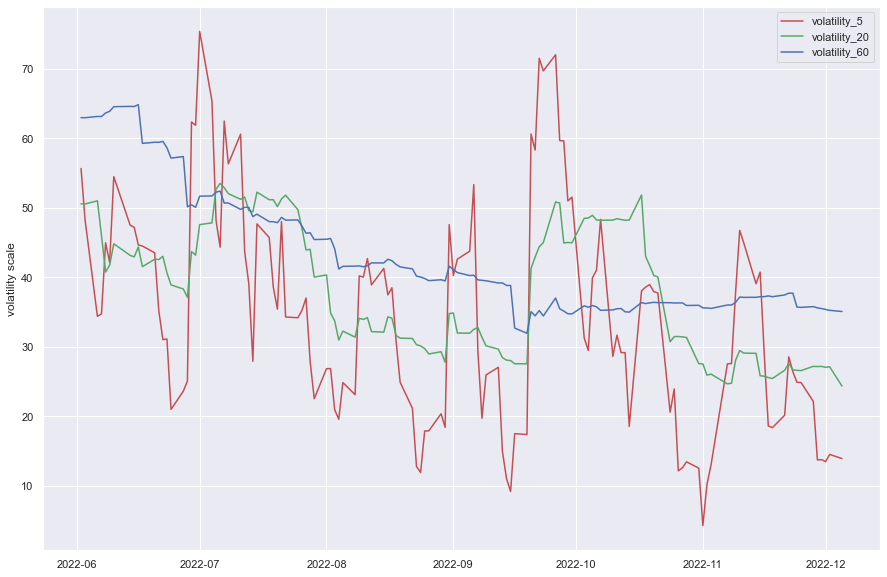

In [17]:
print_start_date = '2022-06-01'
f, ax = plt.subplots(figsize = (15, 10))
sns.lineplot(data = data[data.index > print_start_date], x = 'date', 
             y = 'volatility_5', color = 'r', ax = ax, label = 'volatility_5')
sns.lineplot(data = data[data.index > print_start_date], x = 'date', 
             y = 'volatility_20', color = 'g', ax = ax, label = 'volatility_20')
sns.lineplot(data = data[data.index > print_start_date], x = 'date', 
             y = 'volatility_60', color = 'b', ax = ax, label = 'volatility_60')
ax.set_xlabel('')
ax.set_ylabel('volatility scale')
plt.show()

In [18]:
d_scribe = pd.DataFrame()

In [19]:
v5 = data.volatility_5.describe()

In [20]:
v20 = data.volatility_20.describe()

In [21]:
v60 = data.volatility_60.describe()

In [22]:
d_scribe = pd.concat([d_scribe, v5], axis = 1)

In [23]:
d_scribe = pd.concat([d_scribe, v20], axis = 1)

In [24]:
d_scribe = pd.concat([d_scribe, v60], axis = 1)

In [25]:
d_scribe.drop(['count', 'mean', 'std'])

,volatility_5,volatility_20,volatility_60
min,0.000000,8.787379,10.069452
25%,16.179073,19.338135,20.252844
50%,23.444028,25.107474,26.628719
75%,35.022952,35.781736,36.722993
max,389.638132,221.158893,171.082514


<AxesSubplot:>

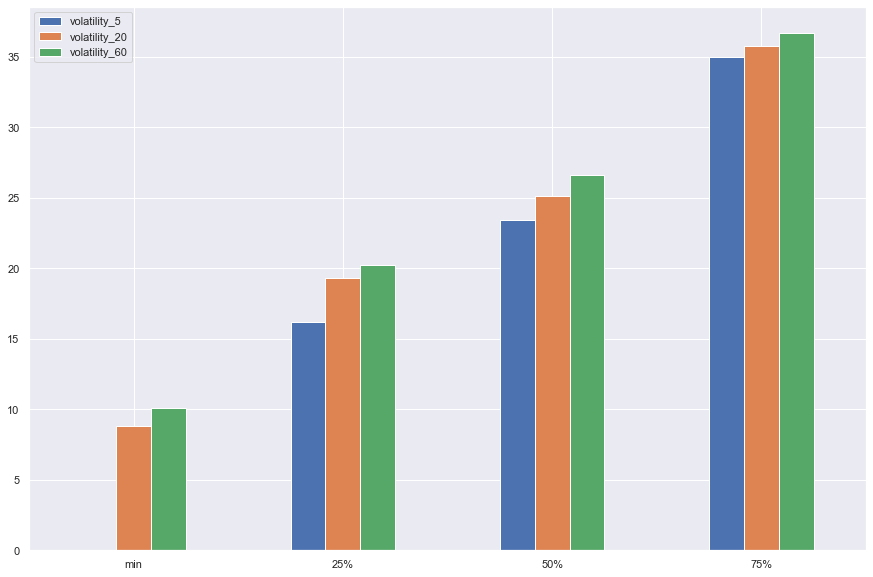

In [26]:
d_scribe.drop(['count', 'mean', 'std', 'max']).plot(kind = 'bar', rot = 0, figsize = (15, 10))

<AxesSubplot:>

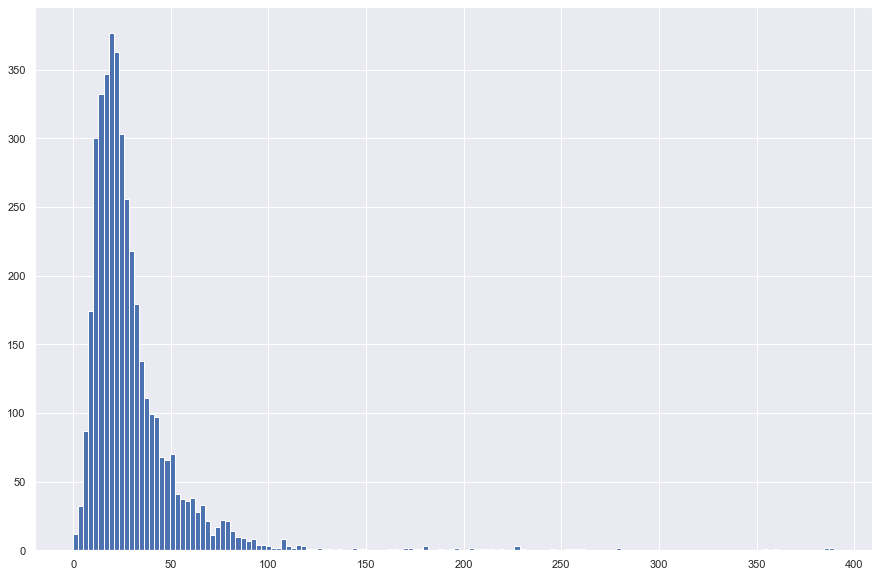

In [27]:
data.volatility_5.hist(bins = 150, figsize = (15, 10))

<AxesSubplot:>

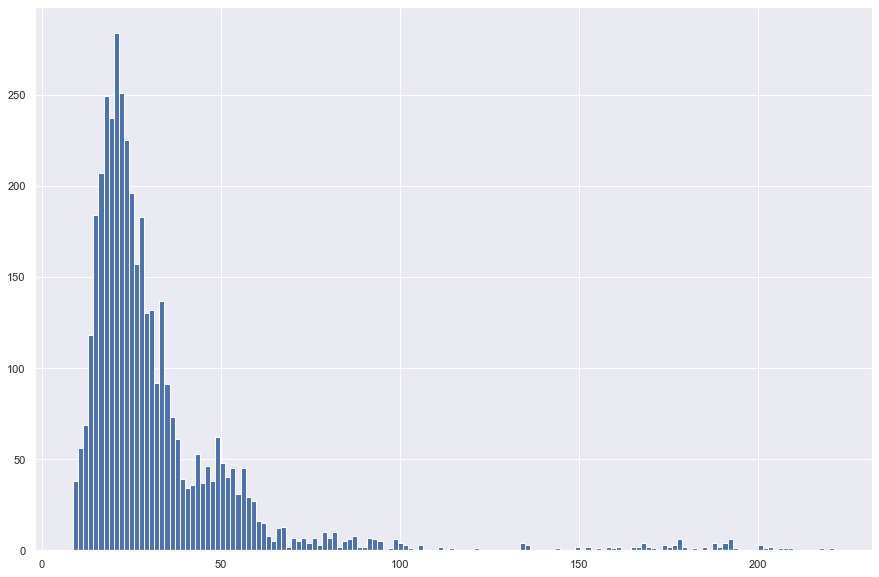

In [28]:
data.volatility_20.hist(bins = 150, figsize = (15, 10))

<AxesSubplot:>

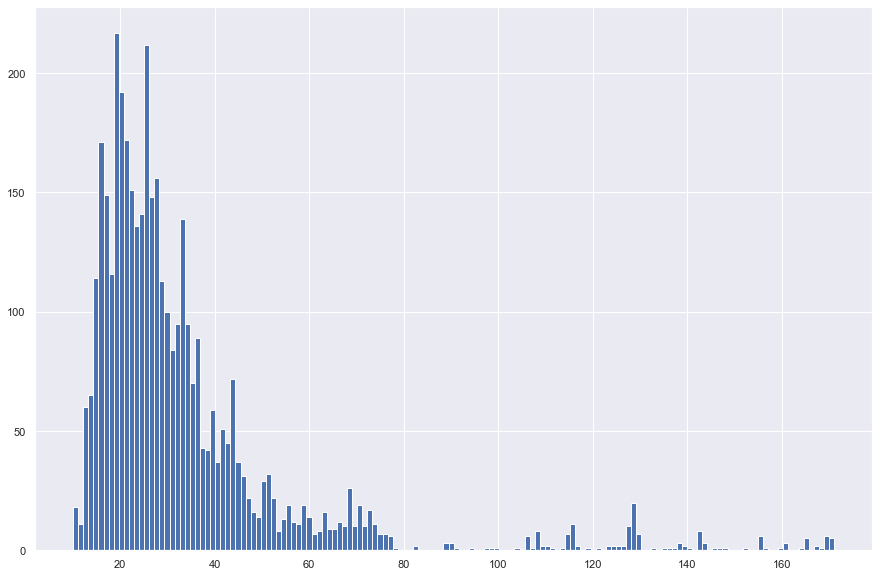

In [29]:
data.volatility_60.hist(bins = 150, figsize = (15, 10))

In [30]:
def log_value(value):
    return np.log(value)

In [31]:
data['volatility_ln60'] = data.volatility_60.apply(log_value)

<AxesSubplot:>

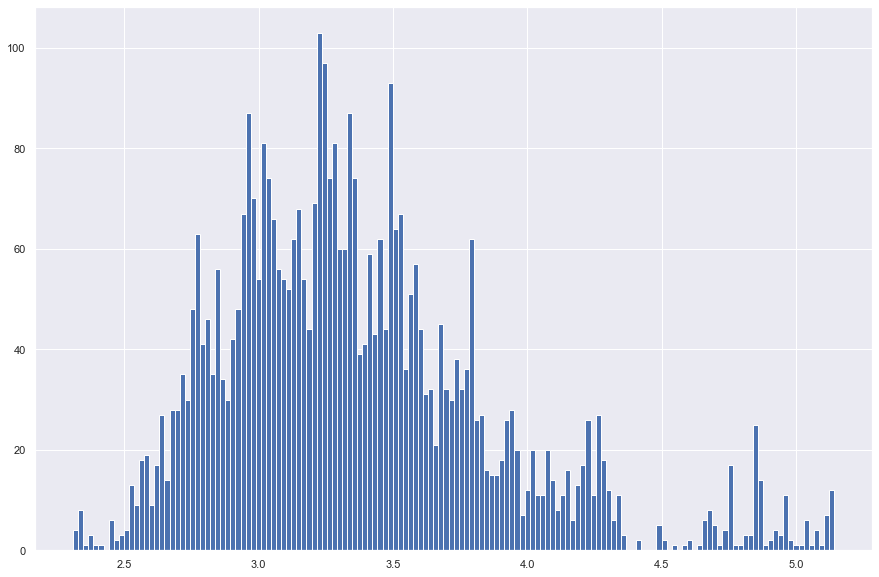

In [32]:
data.volatility_ln60.hist(bins = 150, figsize = (15, 10))

In [33]:
data.volatility_ln60.describe()

count    4005.000000
mean        3.363789
std         0.507150
min         2.309506
25%         3.008295
50%         3.281990
75%         3.603403
max         5.142146
Name: volatility_ln60, dtype: float64

In [34]:
#mean
np.exp(3.361316)

28.82710239474552

In [35]:
#25%
np.exp(3.007292)

20.232535965572424

In [36]:
#50%
np.exp(3.280109)

26.578669616977358

In [37]:
#75%
np.exp(3.602418)

36.68683605073665

In [38]:
returns = data['ln_r'].dropna()

In [39]:
returns.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4071 entries, 2006-09-18 to 2022-12-05
Series name: ln_r
Non-Null Count  Dtype  
--------------  -----  
4071 non-null   float64
dtypes: float64(1)
memory usage: 63.6 KB


In [40]:
returns.describe()

count    4071.000000
mean        0.000098
std         0.025437
min        -0.433067
25%        -0.009647
50%         0.000685
75%         0.010932
max         0.352330
Name: ln_r, dtype: float64

<AxesSubplot:>

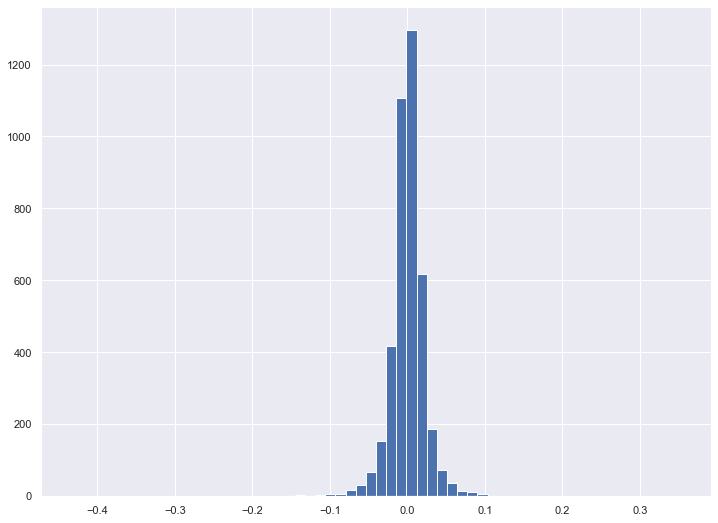

In [41]:
returns.hist(figsize = (12, 9), bins = 60)

In [42]:
random.seed(12345)
rs_list = []
for _ in range(150000):
    random_sample_mean = returns.sample(returns.count(), replace = True).mean()
    rs_list.append(random_sample_mean)

In [43]:
rs_list = pd.DataFrame(rs_list)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

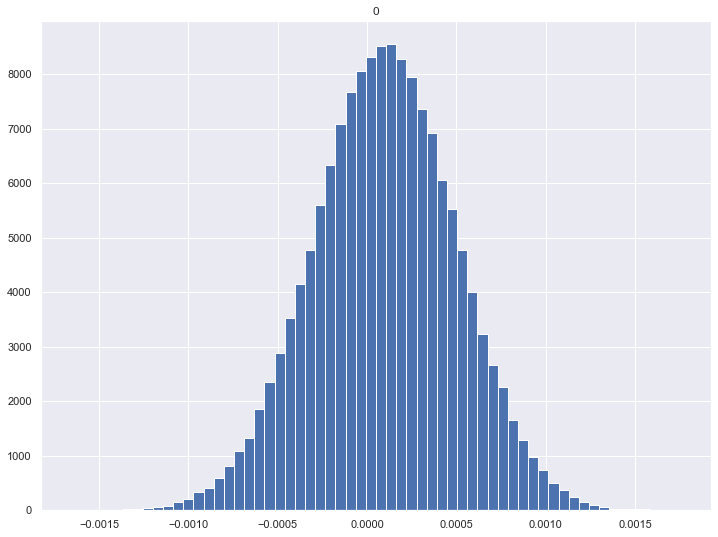

In [44]:
rs_list.hist(figsize = (12, 9), bins = 60)

In [45]:
sigma = rs_list.std() * np.sqrt(returns.count())
sigma

0    0.025493
dtype: float64

In [46]:
sigma * np.sqrt(260)

0    0.411055
dtype: float64

In [47]:
vol5 = data['volatility_5'].dropna()

In [48]:
vol20 = data['volatility_20'].dropna()

In [49]:
vol5.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4067 entries, 2006-09-22 to 2022-12-05
Series name: volatility_5
Non-Null Count  Dtype  
--------------  -----  
4067 non-null   float64
dtypes: float64(1)
memory usage: 63.5 KB


In [50]:
vol20.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4052 entries, 2006-10-13 to 2022-12-05
Series name: volatility_20
Non-Null Count  Dtype  
--------------  -----  
4052 non-null   float64
dtypes: float64(1)
memory usage: 63.3 KB


<AxesSubplot:xlabel='date'>

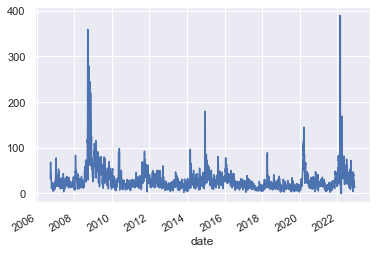

In [51]:
vol5.plot()

<AxesSubplot:xlabel='date'>

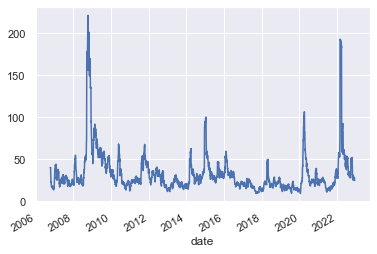

In [52]:
vol20.plot()

<AxesSubplot:>

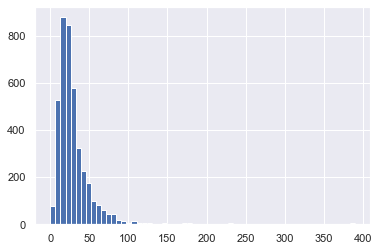

In [53]:
vol5.hist(bins = 60)

<AxesSubplot:>

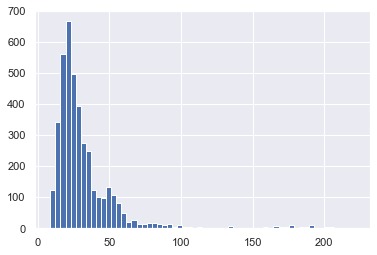

In [54]:
vol20.hist(bins = 60)

In [55]:
v5_list = []
for _ in range(150000):
    random_sample_mean = vol5.sample(vol5.count(), replace = True).mean()
    v5_list.append(random_sample_mean)

In [56]:
v20_list = []
for _ in range(150000):
    random_sample_mean = vol20.sample(vol20.count(), replace = True).mean()
    v20_list.append(random_sample_mean)

In [57]:
v5_list = pd.DataFrame(v5_list)

In [58]:
v20_list = pd.DataFrame(v20_list)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

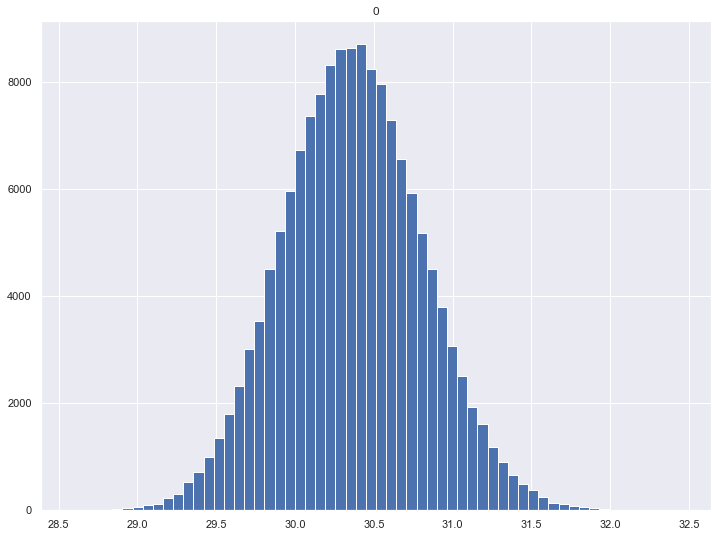

In [59]:
v5_list.hist(figsize = (12, 9), bins = 60)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

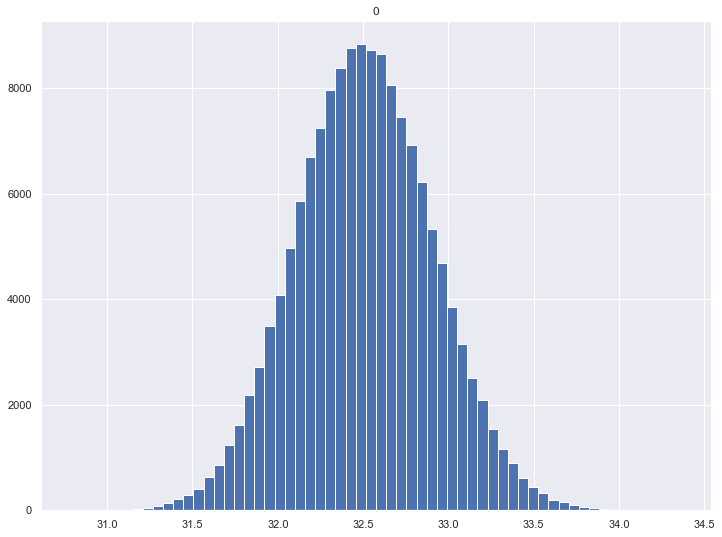

In [60]:
v20_list.hist(figsize = (12, 9), bins = 60)

In [61]:
v5_list.describe()

,0
count,150000.000000
mean,30.366097
std,0.443500
min,28.582218
25%,30.062512
50%,30.360698
75%,30.661208
max,32.444930


In [62]:
v20_list.describe()

,0
count,150000.000000
mean,32.508275
std,0.401293
min,30.791674
25%,32.235441
50%,32.504342
75%,32.778003
max,34.359157


In [63]:
sigma5 = v5_list.std() * np.sqrt(vol5.count())
sigma5

0    28.283361
dtype: float64

In [64]:
sigma20 = v20_list.std() * np.sqrt(vol20.count())
sigma20

0    25.54442
dtype: float64

In [65]:
vol60 = data['volatility_60'].dropna()

In [66]:
vol60.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4005 entries, 2006-12-11 to 2022-12-05
Series name: volatility_60
Non-Null Count  Dtype  
--------------  -----  
4005 non-null   float64
dtypes: float64(1)
memory usage: 62.6 KB


<AxesSubplot:xlabel='date'>

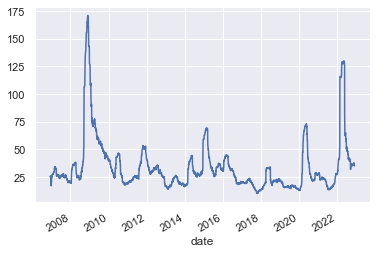

In [67]:
vol60.plot()

<AxesSubplot:>

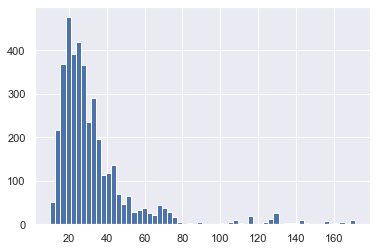

In [68]:
vol60.hist(bins = 60)

In [69]:
v60_list = []
for _ in range(150000):
    random_sample_mean = vol60.sample(vol60.count(), replace = True).mean()
    v60_list.append(random_sample_mean)

In [70]:
v60_list = pd.DataFrame(v60_list)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

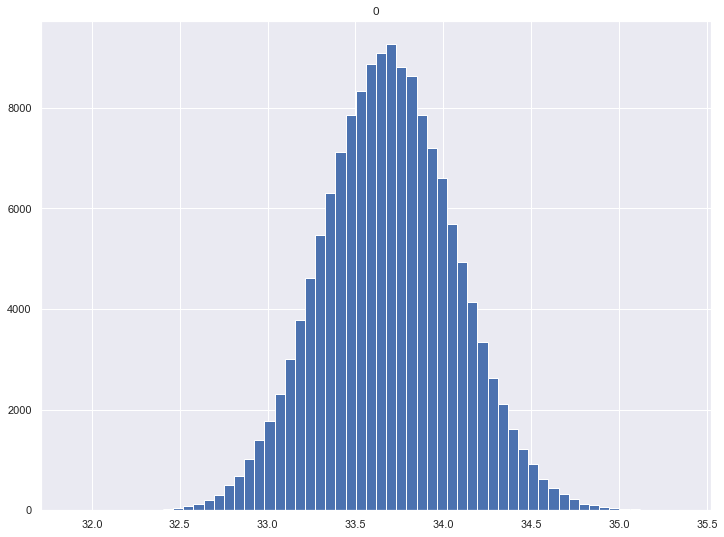

In [71]:
v60_list.hist(figsize = (12, 9), bins = 60)

In [72]:
v60_list.describe()

,0
count,150000.000000
mean,33.690311
std,0.378780
min,31.884929
25%,33.433181
50%,33.686923
75%,33.944420
max,35.348945


In [73]:
sigma60 = v60_list.std() * np.sqrt(vol60.count())
sigma60

0    23.971114
dtype: float64